In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
# open and concat the outputs (120k)
final_results_1 = pd.read_csv("final_results_1.csv").drop(columns="Unnamed: 0")
final_results_2 = pd.read_csv("final_results_2.csv").drop(columns="Unnamed: 0")
final_results_3 = pd.read_csv("final_results_3.csv").drop(columns="Unnamed: 0")
final_results_11 = pd.read_csv("final_results_11.csv").drop(columns="Unnamed: 0")
final_results_12 = pd.read_csv("final_results_12.csv").drop(columns="Unnamed: 0")
final_results_14 = pd.read_csv("final_results_14.csv").drop(columns="Unnamed: 0")
final_results_16 = pd.read_csv("final_results_16.csv").drop(columns="Unnamed: 0") # this one has 5k
final_results_17 = pd.read_csv("final_results_17.csv").drop(columns="Unnamed: 0") # this one has 5k
final_results_18 = pd.read_csv("final_results_18.csv").drop(columns="Unnamed: 0") # this one has 5k
final_results_19 = pd.read_csv("final_results_19.csv").drop(columns="Unnamed: 0") 
final_results_20 = pd.read_csv("final_results_20.csv").drop(columns="Unnamed: 0") 
final_results_21 = pd.read_csv("final_results_21.csv").drop(columns="Unnamed: 0") 
final_results_22 = pd.read_csv("final_results_22.csv").drop(columns="Unnamed: 0") # this one has 5k
final_results_23 = pd.read_csv("final_results_23.csv").drop(columns="Unnamed: 0") # this one has 5k
final_results_24 = pd.read_csv("final_results_24.csv").drop(columns="Unnamed: 0") # this one has 5k

# change the run numbers (so no duplicates) - these have 10k runs       # 0-10k
final_results_2['run_number'] = final_results_2['run_number'] + 10000 # 10-20k
final_results_3['run_number'] = final_results_3['run_number'] + 20000 # 20-30k
final_results_11['run_number'] = final_results_11['run_number'] + 30000 # 30-40k
final_results_12['run_number'] = final_results_12['run_number'] + 40000 # 40-50k
final_results_14['run_number'] = final_results_14['run_number'] + 50000 # 50-60k
final_results_19['run_number'] = final_results_19['run_number'] + 60000 # 60-70k
final_results_20['run_number'] = final_results_20['run_number'] + 70000 # 70-80k
final_results_21['run_number'] = final_results_21['run_number'] + 80000 # 80-90k
# these have 5k
final_results_16['run_number'] = final_results_16['run_number'] + 90000 # 90-95k
final_results_17['run_number'] = final_results_17['run_number'] + 95000 # 95-100k
final_results_18['run_number'] = final_results_18['run_number'] + 100000 # 100k-105k
final_results_22['run_number'] = final_results_22['run_number'] + 105000 # 105k-110k
final_results_23['run_number'] = final_results_23['run_number'] + 110000 # 110k-115k
final_results_24['run_number'] = final_results_24['run_number'] + 115000 # 115-120k

dfs = [final_results_1, final_results_2, final_results_3, final_results_11, final_results_12, final_results_14, final_results_16, final_results_17, final_results_18, final_results_19, final_results_20, final_results_21, final_results_22, final_results_23, final_results_24]

In [34]:
final_accepted_results = pd.DataFrame()
for df in dfs:
    # does it pass the first filters?
    accepted_habs = df.loc[(df['Time'] == 49) & (df['Grassland'] <= 89.9) & (df['Grassland'] >= 26.8) & 
    (df['Thorny Scrub'] <= 51.8) & (df["Thorny Scrub"] >= 4.3) & 
    (df["Woodland"] <= 17) & (df["Woodland"] >= 5.8) &
    (df["Roe deer"] <= 40) & (df["Roe deer"] >= 12)]
    # if yes, tag it as accepted
    df['Run Status'] = np.where(df['run_number'].isin(accepted_habs['run_number']), 'Accepted', 'Rejected')
    # and append those accepted results
    accepted_df = df.loc[df['Run Status'] == 'Accepted']
    final_accepted_results = final_accepted_results.append(accepted_df)

In [35]:
# does it pass the last habitat filters?
last_year = final_accepted_results.loc[final_accepted_results['Time'] == 183]
accepted_habs = last_year.loc[(last_year['Grassland'] <= 36.8) & (last_year['Grassland'] >= 16.8) & 
(last_year['Thorny Scrub'] <= 61.8) & (last_year["Thorny Scrub"] >= 41.8) & 
(last_year["Woodland"] <= 26.5) & (last_year["Woodland"] >= 16.5) &
(last_year["Roe deer"] <= 80) & (last_year["Roe deer"] >= 20)]

# take the top 100 of those
best_results = accepted_habs.nlargest(100, 'passed_filters')
final_df = final_accepted_results['run_number'].isin(best_results['run_number'])
final_df1 = final_accepted_results[final_df]


In [36]:
# what is the range of accepted % filters passed?
print("min:",final_df1["passed_filters"].min()/64)
print("max:",final_df1["passed_filters"].max()/64)

min: 0.640625
max: 0.921875


In [37]:
# get representative sample of rejected for graphing 
rejected_runs_sample = final_results_1[~final_results_1.run_number.isin(final_df1)]
rejected_runs_sample['Run Status'] = "Rejected"
# sample 1000 runs - get unique run_id
one_year_rejected = rejected_runs_sample.loc[rejected_runs_sample['Time'] == 184]
sample_rejected = one_year_rejected.sample(n=1000)
# concat the dataframes and save to csv
final_results_combined = pd.concat([final_df1,sample_rejected], axis=0).reset_index(drop=True)

/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_17078/810639896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results_last["passed_filters_perc"] = final_results_last[["passed_filters"]]/64 # show percentage passed


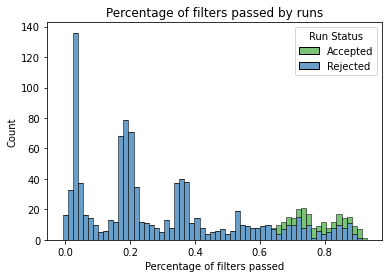

In [38]:
# graph the number of filters passed
final_results_last = final_results_combined.loc[final_results_combined['Time'] == 184]
final_results_last["passed_filters_perc"] = final_results_last[["passed_filters"]]/64 # show percentage passed

d = np.diff(np.unique(final_results_last[['passed_filters_perc']])).min()
left_of_first_bin = np.unique(final_results_last[['passed_filters_perc']]).min() - float(d)/2
right_of_last_bin = np.unique(final_results_last[['passed_filters_perc']]).max() + float(d)/2

fig, ax = plt.subplots()
sns.histplot(
    data=final_results_last, x='passed_filters_perc', hue='Run Status', multiple='stack',
    ax=ax, palette=["#4daf4a", "#377eb8"], bins=np.arange(left_of_first_bin, right_of_last_bin + d, d)
)
plt.xlabel("Percentage of filters passed")
plt.ylabel("Count")
plt.title("Percentage of filters passed by runs")
plt.show()

In [39]:
final_df = pd.DataFrame(np.concatenate([np.repeat(final_results_combined['Run Status'], 10)], axis=0), columns=['runType'])
final_df["Abundance %"] = pd.DataFrame(
                (final_results_combined[["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland","Woodland", "Thorny Scrub","Bare ground"]].values.flatten()))

final_df["runNumber"] = pd.DataFrame(np.concatenate([np.repeat(final_results_combined['run_number'], 10)], axis=0))
final_df["Time"] = pd.DataFrame(np.concatenate([np.repeat(final_results_combined['Time'], 10)], axis=0))
final_df["Ecosystem Element"] = pd.DataFrame(np.tile(["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland",  "Woodland", "Thorny Scrub", "Bare ground"], len(final_results_combined)))


# calculate median 
m = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])[['Abundance %']].apply(np.median)
m.name = 'Median'
final_df = final_df.join(m, on=['Time', 'runType', 'Ecosystem Element'])
# calculate quantiles - try graphing smaller percentiles on top 
perc1 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(1) 
perc1.name = 'onehundperc'
final_df = final_df.join(perc1, on=['Time', 'runType', 'Ecosystem Element'])
perc2 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0) 
perc2.name = "zeroperc"
final_df = final_df.join(perc2, on=['Time','runType', 'Ecosystem Element'])

# now show more quantiles, 95th
perc3 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0.975) 
perc3.name = 'ninetyfiveperc'
final_df = final_df.join(perc3, on=['Time', 'runType', 'Ecosystem Element'])
perc4 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0.025)
perc4.name = "fiveperc"
final_df = final_df.join(perc4, on=['Time','runType', 'Ecosystem Element'])
# and 80th
perc5 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0.9)
perc5.name = 'eightyperc'
final_df = final_df.join(perc5, on=['Time', 'runType', 'Ecosystem Element'])
perc6 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0.1)
perc6.name = "twentyperc"
final_df = final_df.join(perc6, on=['Time','runType', 'Ecosystem Element'])

# reset the index
final_df = final_df.reset_index(drop=True)

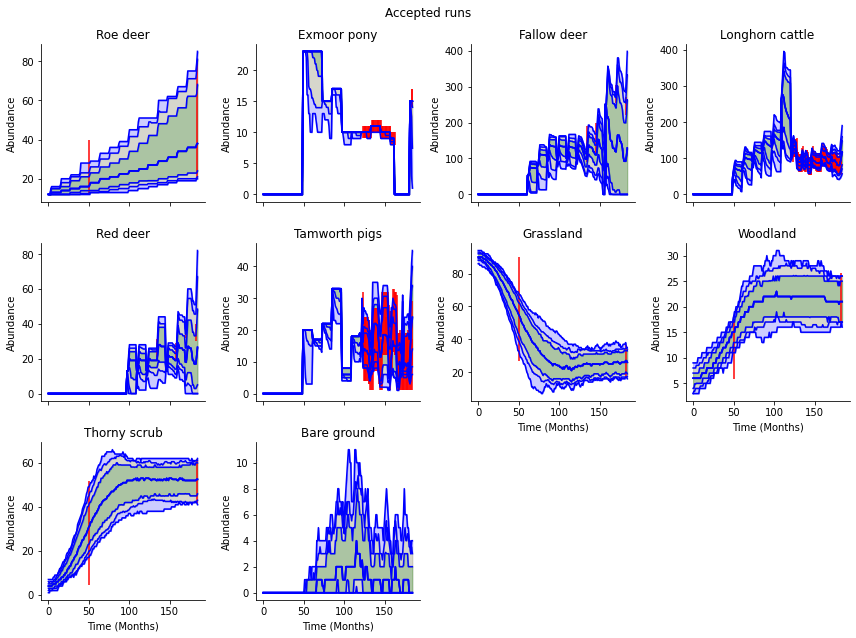

In [40]:
# graph the accepted outputs - are they acceptable?
palette=['blue', 'yellow', 'green']

# conditions
final_graph = final_df.loc[(final_df['runType'] == "Accepted")]
final_graph = final_graph.reset_index(drop=True)
f = sns.FacetGrid(final_graph, col="Ecosystem Element", hue = "runType", palette = palette, col_wrap=4, sharey = False)
f.map(sns.lineplot, 'Time', 'Median')
f.map(sns.lineplot, 'Time', 'onehundperc')
f.map(sns.lineplot, 'Time', 'zeroperc')
# now other percentiles
f.map(sns.lineplot, 'Time', 'Median')
f.map(sns.lineplot, 'Time', 'ninetyfiveperc')
f.map(sns.lineplot, 'Time', 'fiveperc')
# now other percentiles
f.map(sns.lineplot, 'Time', 'Median')
f.map(sns.lineplot, 'Time', 'eightyperc')
f.map(sns.lineplot, 'Time', 'twentyperc')

for ax in f.axes.flat:
    ax.fill_between(ax.lines[1].get_xdata(),ax.lines[1].get_ydata(), ax.lines[2].get_ydata(),  color="blue",alpha =0.2)
    # 95 perc
    ax.fill_between(ax.lines[4].get_xdata(),ax.lines[4].get_ydata(), ax.lines[5].get_ydata(),  color="yellow",alpha =0.2)
    # 80 perc
    ax.fill_between(ax.lines[7].get_xdata(),ax.lines[7].get_ydata(), ax.lines[8].get_ydata(),  color="green",alpha =0.2)

    ax.set_ylabel('Abundance')
    ax.set_xlabel('Time (Months)')
# add subplot titles
axes = f.axes.flatten()
# fill between the quantiles
axes[0].set_title("Roe deer")
axes[1].set_title("Exmoor pony")
axes[2].set_title("Fallow deer")
axes[3].set_title("Longhorn cattle")
axes[4].set_title("Red deer")
axes[5].set_title("Tamworth pigs")
axes[6].set_title("Grassland")
axes[7].set_title("Woodland")
axes[8].set_title("Thorny scrub")
axes[9].set_title("Bare ground")
# add filter lines
f.axes[0].vlines(x=50,ymin=12,ymax=40, color='r')
f.axes[6].vlines(x=50,ymin=26.8,ymax=89.9, color='r')
f.axes[7].vlines(x=50,ymin=5.8,ymax=17, color='r')
f.axes[8].vlines(x=50,ymin=4.3,ymax=51.8, color='r')
f.axes[1].vlines(x=123,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=123,ymin=90,ymax=140, color='r')
f.axes[5].vlines(x=123,ymin=12,ymax=32, color='r')
# May 2015
f.axes[3].vlines(x=124,ymin=104,ymax=154, color='r')
f.axes[5].vlines(x=124,ymin=4,ymax=24, color='r')
f.axes[1].vlines(x=124,ymin=9,ymax=11, color='r')
# June 2015
f.axes[3].vlines(x=125,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=125,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=125,ymin=4,ymax=24, color='r')
# July 2015
f.axes[3].vlines(x=126,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=126,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=126,ymin=4,ymax=24, color='r')
# Aug 2015
f.axes[3].vlines(x=127,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=127,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=127,ymin=4,ymax=24, color='r')
# Sept 2015
f.axes[3].vlines(x=128,ymin=105,ymax=155, color='r')
f.axes[1].vlines(x=128,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=128,ymin=4,ymax=24, color='r')
# Oct 2015
f.axes[3].vlines(x=129,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=129,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=129,ymin=4,ymax=24, color='r')
# Nov 2015
f.axes[3].vlines(x=130,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=130,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=130,ymin=3,ymax=23, color='r')
# Dec 2015
f.axes[3].vlines(x=131,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=131,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=131,ymin=3,ymax=23, color='r')
# Jan 2016
f.axes[3].vlines(x=132,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=132,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=132,ymin=1,ymax=20, color='r')
# Feb 2016
f.axes[1].vlines(x=133,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=133,ymin=61,ymax=111, color='r')
f.axes[5].vlines(x=133,ymin=1,ymax=20, color='r')
# March 2016
f.axes[1].vlines(x=134,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=134,ymin=61,ymax=111, color='r')
f.axes[2].vlines(x=134,ymin=90,ymax=190, color='r')
f.axes[4].vlines(x=134,ymin=21,ymax=31, color='r')
f.axes[5].vlines(x=134,ymin=1,ymax=19, color='r')
# April 2016
f.axes[1].vlines(x=135,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=135,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=135,ymin=1,ymax=19, color='r')
# May 2016
f.axes[1].vlines(x=136,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=136,ymin=83,ymax=133, color='r')
f.axes[5].vlines(x=136,ymin=7,ymax=27, color='r')
# June 2016
f.axes[1].vlines(x=137,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=137,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=137,ymin=7,ymax=27, color='r')
# July 2016
f.axes[1].vlines(x=138,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=138,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=138,ymin=7,ymax=27, color='r')
# Aug 2016
f.axes[1].vlines(x=139,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=139,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=139,ymin=7,ymax=27, color='r')
# Sept 2016
f.axes[1].vlines(x=140,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=140,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=140,ymin=7,ymax=27, color='r')
# Oct 2016
f.axes[1].vlines(x=141,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=141,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=141,ymin=7,ymax=27, color='r')
# Nov 2016
f.axes[1].vlines(x=142,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=142,ymin=67,ymax=117, color='r')
f.axes[5].vlines(x=142,ymin=7,ymax=27, color='r')
# Dec 2016
f.axes[1].vlines(x=143,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=143,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=143,ymin=3,ymax=23, color='r')
# Jan 2017
f.axes[1].vlines(x=144,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=144,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=144,ymin=1,ymax=19, color='r')
# Feb 2017
f.axes[1].vlines(x=145,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=145,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=145,ymin=1,ymax=17, color='r')
# March 2017
f.axes[1].vlines(x=146,ymin=9,ymax=11, color='r')
f.axes[2].vlines(x=146,ymin=115,ymax=200, color='r')
f.axes[3].vlines(x=146,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=146,ymin=1,ymax=17, color='r')
# April 2017
f.axes[1].vlines(x=147,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=147,ymin=75,ymax=125, color='r')
f.axes[5].vlines(x=147,ymin=12,ymax=32, color='r')
# May 2017
f.axes[1].vlines(x=148,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=148,ymin=84,ymax=134, color='r')
f.axes[5].vlines(x=148,ymin=12,ymax=32, color='r')
# June 2017
f.axes[1].vlines(x=149,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=149,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=149,ymin=12,ymax=32, color='r')
# July 2017
f.axes[1].vlines(x=150,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=150,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=150,ymin=12,ymax=32, color='r')
# Aug 2017
f.axes[1].vlines(x=151,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=151,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=151,ymin=12,ymax=32, color='r')
# Sept 2017
f.axes[1].vlines(x=152,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=152,ymin=65,ymax=115, color='r')
f.axes[5].vlines(x=152,ymin=20,ymax=24, color='r')
# Oct 2017
f.axes[1].vlines(x=153,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=153,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=153,ymin=12,ymax=32, color='r')
# Nov 2017
f.axes[1].vlines(x=154,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=154,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=154,ymin=12,ymax=32, color='r')
# Dec 2017
f.axes[1].vlines(x=155,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=155,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=155,ymin=8,ymax=28, color='r')
# Jan 2018
f.axes[1].vlines(x=156,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=156,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=156,ymin=1,ymax=21, color='r')
# Feb 2018
f.axes[1].vlines(x=157,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=157,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=157,ymin=6,ymax=26, color='r')
# March 2018
f.axes[1].vlines(x=158,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=158,ymin=63,ymax=113, color='r')
f.axes[4].vlines(x=158,ymin=19,ymax=29, color='r')
f.axes[5].vlines(x=158,ymin=6,ymax=26, color='r')
# April 2018
f.axes[1].vlines(x=159,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=159,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=159,ymin=6,ymax=26, color='r')
# May 2018
f.axes[1].vlines(x=160,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=160,ymin=92,ymax=142, color='r')
f.axes[5].vlines(x=160,ymin=13,ymax=33, color='r')
# June 2018
f.axes[1].vlines(x=161,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=161,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=161,ymin=13,ymax=33, color='r')
# July 2018
f.axes[1].vlines(x=162,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=162,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=162,ymin=12,ymax=32, color='r')
# Aug 2018
f.axes[3].vlines(x=163,ymin=77,ymax=127, color='r')
f.axes[5].vlines(x=163,ymin=12,ymax=32, color='r')
# Sept 2018
f.axes[3].vlines(x=164,ymin=81,ymax=131, color='r')
f.axes[5].vlines(x=164,ymin=12,ymax=32, color='r')
# Oct 2018
f.axes[3].vlines(x=165,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=165,ymin=11,ymax=31, color='r')
# Nov 2018
f.axes[3].vlines(x=166,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=166,ymin=1,ymax=19, color='r')
# Dec 2018
f.axes[3].vlines(x=167,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=167,ymin=1,ymax=19, color='r')
# Jan 2019
f.axes[3].vlines(x=168,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=168,ymin=1,ymax=19, color='r')
# Feb 2019
f.axes[3].vlines(x=169,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=169,ymin=1,ymax=20, color='r')
# March 2019
f.axes[2].vlines(x=170,ymin=253,ymax=303, color='r')
f.axes[3].vlines(x=170,ymin=62,ymax=112, color='r')
f.axes[4].vlines(x=170,ymin=32,ymax=42, color='r')
f.axes[5].vlines(x=170,ymin=1,ymax=19, color='r')
# April 2019
f.axes[3].vlines(x=171,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=171,ymin=1,ymax=18, color='r')
# May 2019
f.axes[3].vlines(x=172,ymin=85,ymax=135, color='r')
f.axes[5].vlines(x=172,ymin=1,ymax=18, color='r')
# June 2019
f.axes[3].vlines(x=173,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=173,ymin=1,ymax=18, color='r')
# July 2019
f.axes[3].vlines(x=174,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=174,ymin=1,ymax=19, color='r')
# Aug 2019
f.axes[3].vlines(x=175,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=175,ymin=1,ymax=19, color='r')  
# Sept 2019
f.axes[3].vlines(x=176,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=176,ymin=1,ymax=19, color='r')
# Oct 2019
f.axes[3].vlines(x=177,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=177,ymin=1,ymax=19, color='r')
# Nov 2019
f.axes[3].vlines(x=178,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=178,ymin=1,ymax=19, color='r')
# Dec 2019
f.axes[3].vlines(x=179,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=179,ymin=1,ymax=20, color='r')
# Jan 2020
f.axes[3].vlines(x=180,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=180,ymin=1,ymax=20, color='r')
# Feb 2020
f.axes[3].vlines(x=181,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=181,ymin=1,ymax=18, color='r')
# March 2020
f.axes[2].vlines(x=182,ymin=222,ymax=272, color='r')
f.axes[4].vlines(x=182,ymin=30,ymax=40, color='r')
f.axes[3].vlines(x=182,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=182,ymin=1,ymax=17, color='r')
# April 2020
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=1,ymax=17, color='r')
# plot next set of filter lines
f.axes[0].vlines(x=183,ymin=20,ymax=80, color='r')
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=9,ymax=29, color='r')
f.axes[6].vlines(x=183,ymin=16.8,ymax=36.8, color='r')
f.axes[7].vlines(x=183,ymin=16.5,ymax=26.5, color='r')
f.axes[8].vlines(x=183,ymin=41.8,ymax=61.8, color='r')

# stop the plots from overlapping
f.fig.suptitle('Accepted runs')
plt.tight_layout()
plt.show()

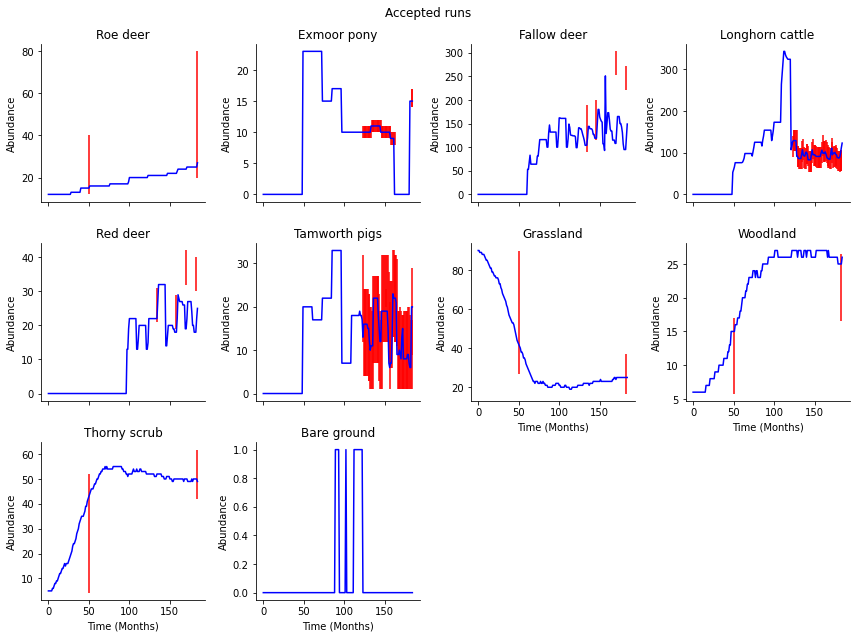

In [85]:
best_run = final_results_combined.loc[final_results_combined["passed_filters_perc"] == 0.921875]

final_df = pd.DataFrame(np.concatenate([np.repeat(best_run['Run Status'], 10)], axis=0), columns=['runType'])
final_df["Abundance %"] = pd.DataFrame(
                (best_run[["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland","Woodland", "Thorny Scrub","Bare ground"]].values.flatten()))

final_df["runNumber"] = pd.DataFrame(np.concatenate([np.repeat(best_run['run_number'], 10)], axis=0))
final_df["Time"] = pd.DataFrame(np.concatenate([np.repeat(best_run['Time'], 10)], axis=0))
final_df["Ecosystem Element"] = pd.DataFrame(np.tile(["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland",  "Woodland", "Thorny Scrub", "Bare ground"], len(best_run)))

# graph the accepted outputs - are they acceptable?
palette=['blue', 'yellow', 'green']

# conditions
final_graph = final_df.loc[(final_df['runType'] == "Accepted")]
final_graph = final_graph.reset_index(drop=True)
f = sns.FacetGrid(final_graph, col="Ecosystem Element", hue = "runType", palette = palette, col_wrap=4, sharey = False)
f.map(sns.lineplot, 'Time', 'Abundance %')


for ax in f.axes.flat:
    ax.set_ylabel('Abundance')
    ax.set_xlabel('Time (Months)')
# add subplot titles
axes = f.axes.flatten()
# fill between the quantiles
axes[0].set_title("Roe deer")
axes[1].set_title("Exmoor pony")
axes[2].set_title("Fallow deer")
axes[3].set_title("Longhorn cattle")
axes[4].set_title("Red deer")
axes[5].set_title("Tamworth pigs")
axes[6].set_title("Grassland")
axes[7].set_title("Woodland")
axes[8].set_title("Thorny scrub")
axes[9].set_title("Bare ground")
# add filter lines
f.axes[0].vlines(x=50,ymin=12,ymax=40, color='r')
f.axes[6].vlines(x=50,ymin=26.8,ymax=89.9, color='r')
f.axes[7].vlines(x=50,ymin=5.8,ymax=17, color='r')
f.axes[8].vlines(x=50,ymin=4.3,ymax=51.8, color='r')
f.axes[1].vlines(x=123,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=123,ymin=90,ymax=140, color='r')
f.axes[5].vlines(x=123,ymin=12,ymax=32, color='r')
# May 2015
f.axes[3].vlines(x=124,ymin=104,ymax=154, color='r')
f.axes[5].vlines(x=124,ymin=4,ymax=24, color='r')
f.axes[1].vlines(x=124,ymin=9,ymax=11, color='r')
# June 2015
f.axes[3].vlines(x=125,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=125,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=125,ymin=4,ymax=24, color='r')
# July 2015
f.axes[3].vlines(x=126,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=126,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=126,ymin=4,ymax=24, color='r')
# Aug 2015
f.axes[3].vlines(x=127,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=127,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=127,ymin=4,ymax=24, color='r')
# Sept 2015
f.axes[3].vlines(x=128,ymin=105,ymax=155, color='r')
f.axes[1].vlines(x=128,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=128,ymin=4,ymax=24, color='r')
# Oct 2015
f.axes[3].vlines(x=129,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=129,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=129,ymin=4,ymax=24, color='r')
# Nov 2015
f.axes[3].vlines(x=130,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=130,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=130,ymin=3,ymax=23, color='r')
# Dec 2015
f.axes[3].vlines(x=131,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=131,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=131,ymin=3,ymax=23, color='r')
# Jan 2016
f.axes[3].vlines(x=132,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=132,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=132,ymin=1,ymax=20, color='r')
# Feb 2016
f.axes[1].vlines(x=133,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=133,ymin=61,ymax=111, color='r')
f.axes[5].vlines(x=133,ymin=1,ymax=20, color='r')
# March 2016
f.axes[1].vlines(x=134,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=134,ymin=61,ymax=111, color='r')
f.axes[2].vlines(x=134,ymin=90,ymax=190, color='r')
f.axes[4].vlines(x=134,ymin=21,ymax=31, color='r')
f.axes[5].vlines(x=134,ymin=1,ymax=19, color='r')
# April 2016
f.axes[1].vlines(x=135,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=135,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=135,ymin=1,ymax=19, color='r')
# May 2016
f.axes[1].vlines(x=136,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=136,ymin=83,ymax=133, color='r')
f.axes[5].vlines(x=136,ymin=7,ymax=27, color='r')
# June 2016
f.axes[1].vlines(x=137,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=137,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=137,ymin=7,ymax=27, color='r')
# July 2016
f.axes[1].vlines(x=138,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=138,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=138,ymin=7,ymax=27, color='r')
# Aug 2016
f.axes[1].vlines(x=139,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=139,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=139,ymin=7,ymax=27, color='r')
# Sept 2016
f.axes[1].vlines(x=140,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=140,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=140,ymin=7,ymax=27, color='r')
# Oct 2016
f.axes[1].vlines(x=141,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=141,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=141,ymin=7,ymax=27, color='r')
# Nov 2016
f.axes[1].vlines(x=142,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=142,ymin=67,ymax=117, color='r')
f.axes[5].vlines(x=142,ymin=7,ymax=27, color='r')
# Dec 2016
f.axes[1].vlines(x=143,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=143,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=143,ymin=3,ymax=23, color='r')
# Jan 2017
f.axes[1].vlines(x=144,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=144,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=144,ymin=1,ymax=19, color='r')
# Feb 2017
f.axes[1].vlines(x=145,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=145,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=145,ymin=1,ymax=17, color='r')
# March 2017
f.axes[1].vlines(x=146,ymin=9,ymax=11, color='r')
f.axes[2].vlines(x=146,ymin=115,ymax=200, color='r')
f.axes[3].vlines(x=146,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=146,ymin=1,ymax=17, color='r')
# April 2017
f.axes[1].vlines(x=147,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=147,ymin=75,ymax=125, color='r')
f.axes[5].vlines(x=147,ymin=12,ymax=32, color='r')
# May 2017
f.axes[1].vlines(x=148,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=148,ymin=84,ymax=134, color='r')
f.axes[5].vlines(x=148,ymin=12,ymax=32, color='r')
# June 2017
f.axes[1].vlines(x=149,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=149,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=149,ymin=12,ymax=32, color='r')
# July 2017
f.axes[1].vlines(x=150,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=150,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=150,ymin=12,ymax=32, color='r')
# Aug 2017
f.axes[1].vlines(x=151,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=151,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=151,ymin=12,ymax=32, color='r')
# Sept 2017
f.axes[1].vlines(x=152,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=152,ymin=65,ymax=115, color='r')
f.axes[5].vlines(x=152,ymin=20,ymax=24, color='r')
# Oct 2017
f.axes[1].vlines(x=153,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=153,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=153,ymin=12,ymax=32, color='r')
# Nov 2017
f.axes[1].vlines(x=154,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=154,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=154,ymin=12,ymax=32, color='r')
# Dec 2017
f.axes[1].vlines(x=155,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=155,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=155,ymin=8,ymax=28, color='r')
# Jan 2018
f.axes[1].vlines(x=156,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=156,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=156,ymin=1,ymax=21, color='r')
# Feb 2018
f.axes[1].vlines(x=157,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=157,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=157,ymin=6,ymax=26, color='r')
# March 2018
f.axes[1].vlines(x=158,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=158,ymin=63,ymax=113, color='r')
f.axes[4].vlines(x=158,ymin=19,ymax=29, color='r')
f.axes[5].vlines(x=158,ymin=6,ymax=26, color='r')
# April 2018
f.axes[1].vlines(x=159,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=159,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=159,ymin=6,ymax=26, color='r')
# May 2018
f.axes[1].vlines(x=160,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=160,ymin=92,ymax=142, color='r')
f.axes[5].vlines(x=160,ymin=13,ymax=33, color='r')
# June 2018
f.axes[1].vlines(x=161,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=161,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=161,ymin=13,ymax=33, color='r')
# July 2018
f.axes[1].vlines(x=162,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=162,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=162,ymin=12,ymax=32, color='r')
# Aug 2018
f.axes[3].vlines(x=163,ymin=77,ymax=127, color='r')
f.axes[5].vlines(x=163,ymin=12,ymax=32, color='r')
# Sept 2018
f.axes[3].vlines(x=164,ymin=81,ymax=131, color='r')
f.axes[5].vlines(x=164,ymin=12,ymax=32, color='r')
# Oct 2018
f.axes[3].vlines(x=165,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=165,ymin=11,ymax=31, color='r')
# Nov 2018
f.axes[3].vlines(x=166,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=166,ymin=1,ymax=19, color='r')
# Dec 2018
f.axes[3].vlines(x=167,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=167,ymin=1,ymax=19, color='r')
# Jan 2019
f.axes[3].vlines(x=168,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=168,ymin=1,ymax=19, color='r')
# Feb 2019
f.axes[3].vlines(x=169,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=169,ymin=1,ymax=20, color='r')
# March 2019
f.axes[2].vlines(x=170,ymin=253,ymax=303, color='r')
f.axes[3].vlines(x=170,ymin=62,ymax=112, color='r')
f.axes[4].vlines(x=170,ymin=32,ymax=42, color='r')
f.axes[5].vlines(x=170,ymin=1,ymax=19, color='r')
# April 2019
f.axes[3].vlines(x=171,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=171,ymin=1,ymax=18, color='r')
# May 2019
f.axes[3].vlines(x=172,ymin=85,ymax=135, color='r')
f.axes[5].vlines(x=172,ymin=1,ymax=18, color='r')
# June 2019
f.axes[3].vlines(x=173,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=173,ymin=1,ymax=18, color='r')
# July 2019
f.axes[3].vlines(x=174,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=174,ymin=1,ymax=19, color='r')
# Aug 2019
f.axes[3].vlines(x=175,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=175,ymin=1,ymax=19, color='r')  
# Sept 2019
f.axes[3].vlines(x=176,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=176,ymin=1,ymax=19, color='r')
# Oct 2019
f.axes[3].vlines(x=177,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=177,ymin=1,ymax=19, color='r')
# Nov 2019
f.axes[3].vlines(x=178,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=178,ymin=1,ymax=19, color='r')
# Dec 2019
f.axes[3].vlines(x=179,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=179,ymin=1,ymax=20, color='r')
# Jan 2020
f.axes[3].vlines(x=180,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=180,ymin=1,ymax=20, color='r')
# Feb 2020
f.axes[3].vlines(x=181,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=181,ymin=1,ymax=18, color='r')
# March 2020
f.axes[2].vlines(x=182,ymin=222,ymax=272, color='r')
f.axes[4].vlines(x=182,ymin=30,ymax=40, color='r')
f.axes[3].vlines(x=182,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=182,ymin=1,ymax=17, color='r')
# April 2020
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=1,ymax=17, color='r')
# plot next set of filter lines
f.axes[0].vlines(x=183,ymin=20,ymax=80, color='r')
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=9,ymax=29, color='r')
f.axes[6].vlines(x=183,ymin=16.8,ymax=36.8, color='r')
f.axes[7].vlines(x=183,ymin=16.5,ymax=26.5, color='r')
f.axes[8].vlines(x=183,ymin=41.8,ymax=61.8, color='r')

# stop the plots from overlapping
f.fig.suptitle('Accepted runs')
plt.tight_layout()
plt.show()

In [87]:
# what are the best params?
best_param = dfs_params[dfs_params.run_number.isin(best_run['run_number'])]
best_param = best_param.iloc[:,1:48]
# run it with these
best_param.to_csv('best_params.csv')

### What are the distributions of accepted parameters?

In [41]:
# open the parameter files
accepted_parameter_1 = pd.read_csv("all_parameters_1.csv")
accepted_parameter_2 = pd.read_csv("all_parameters_2.csv")
accepted_parameter_3 = pd.read_csv("all_parameters_3.csv")
accepted_parameter_11 = pd.read_csv("all_parameters_11.csv")
accepted_parameter_12 = pd.read_csv("all_parameters_12.csv")
accepted_parameter_14 = pd.read_csv("all_parameters_14.csv")
accepted_parameter_16 = pd.read_csv("all_parameters_16.csv")
accepted_parameter_17 = pd.read_csv("all_parameters_17.csv")
accepted_parameter_18 = pd.read_csv("all_parameters_18.csv")
accepted_parameter_19 = pd.read_csv("all_parameters_19.csv")
accepted_parameter_20 = pd.read_csv("all_parameters_20.csv")
accepted_parameter_21 = pd.read_csv("all_parameters_21.csv")
accepted_parameter_22 = pd.read_csv("all_parameters_22.csv")
accepted_parameter_23 = pd.read_csv("all_parameters_23.csv")
accepted_parameter_24 = pd.read_csv("all_parameters_24.csv")

# change the run numbers (so no duplicates) - these have 10k runs       # 0-10k
accepted_parameter_2['run_number'] = accepted_parameter_2['run_number'] + 10000 # 10-20k
accepted_parameter_3['run_number'] = accepted_parameter_3['run_number'] + 20000 # 20-30k
accepted_parameter_11['run_number'] = accepted_parameter_11['run_number'] + 30000 # 30-40k
accepted_parameter_12['run_number'] = accepted_parameter_12['run_number'] + 40000 # 40-50k
accepted_parameter_14['run_number'] = accepted_parameter_14['run_number'] + 50000 # 50-60k
accepted_parameter_19['run_number'] = accepted_parameter_19['run_number'] + 60000 # 60-70k
accepted_parameter_20['run_number'] = accepted_parameter_20['run_number'] + 70000 # 70-80k
accepted_parameter_21['run_number'] = accepted_parameter_21['run_number'] + 80000 # 80-90k
accepted_parameter_16['run_number'] = accepted_parameter_16['run_number'] + 90000 # 90-95k
accepted_parameter_17['run_number'] = accepted_parameter_17['run_number'] + 95000 # 95-100k
accepted_parameter_18['run_number'] = accepted_parameter_18['run_number'] + 100000 # 100k-105k
accepted_parameter_22['run_number'] = accepted_parameter_22['run_number'] + 105000 # 105k-110k
accepted_parameter_23['run_number'] = accepted_parameter_23['run_number'] + 110000 # 110k-115k
accepted_parameter_24['run_number'] = accepted_parameter_24['run_number'] + 115000 # 115-120k

dfs_params = pd.concat([accepted_parameter_1, accepted_parameter_2, accepted_parameter_3, accepted_parameter_11, accepted_parameter_12, accepted_parameter_14, accepted_parameter_16, accepted_parameter_17, accepted_parameter_18, accepted_parameter_19, accepted_parameter_20,accepted_parameter_21, accepted_parameter_22, accepted_parameter_23,accepted_parameter_24], axis=0).drop(columns="Unnamed: 0")

In [42]:
# which ones were accepted? 
accepted_params = dfs_params[dfs_params.run_number.isin(best_results['run_number'])]
accepted_params = accepted_params.iloc[:,1:48]
# need one more column so add number of runs
accepted_params["perc_passed_filters"] = best_results['passed_filters'].values/64

In [43]:
# save the output to a csv
accepted_params.to_csv('combined_accepted_parameters.csv')

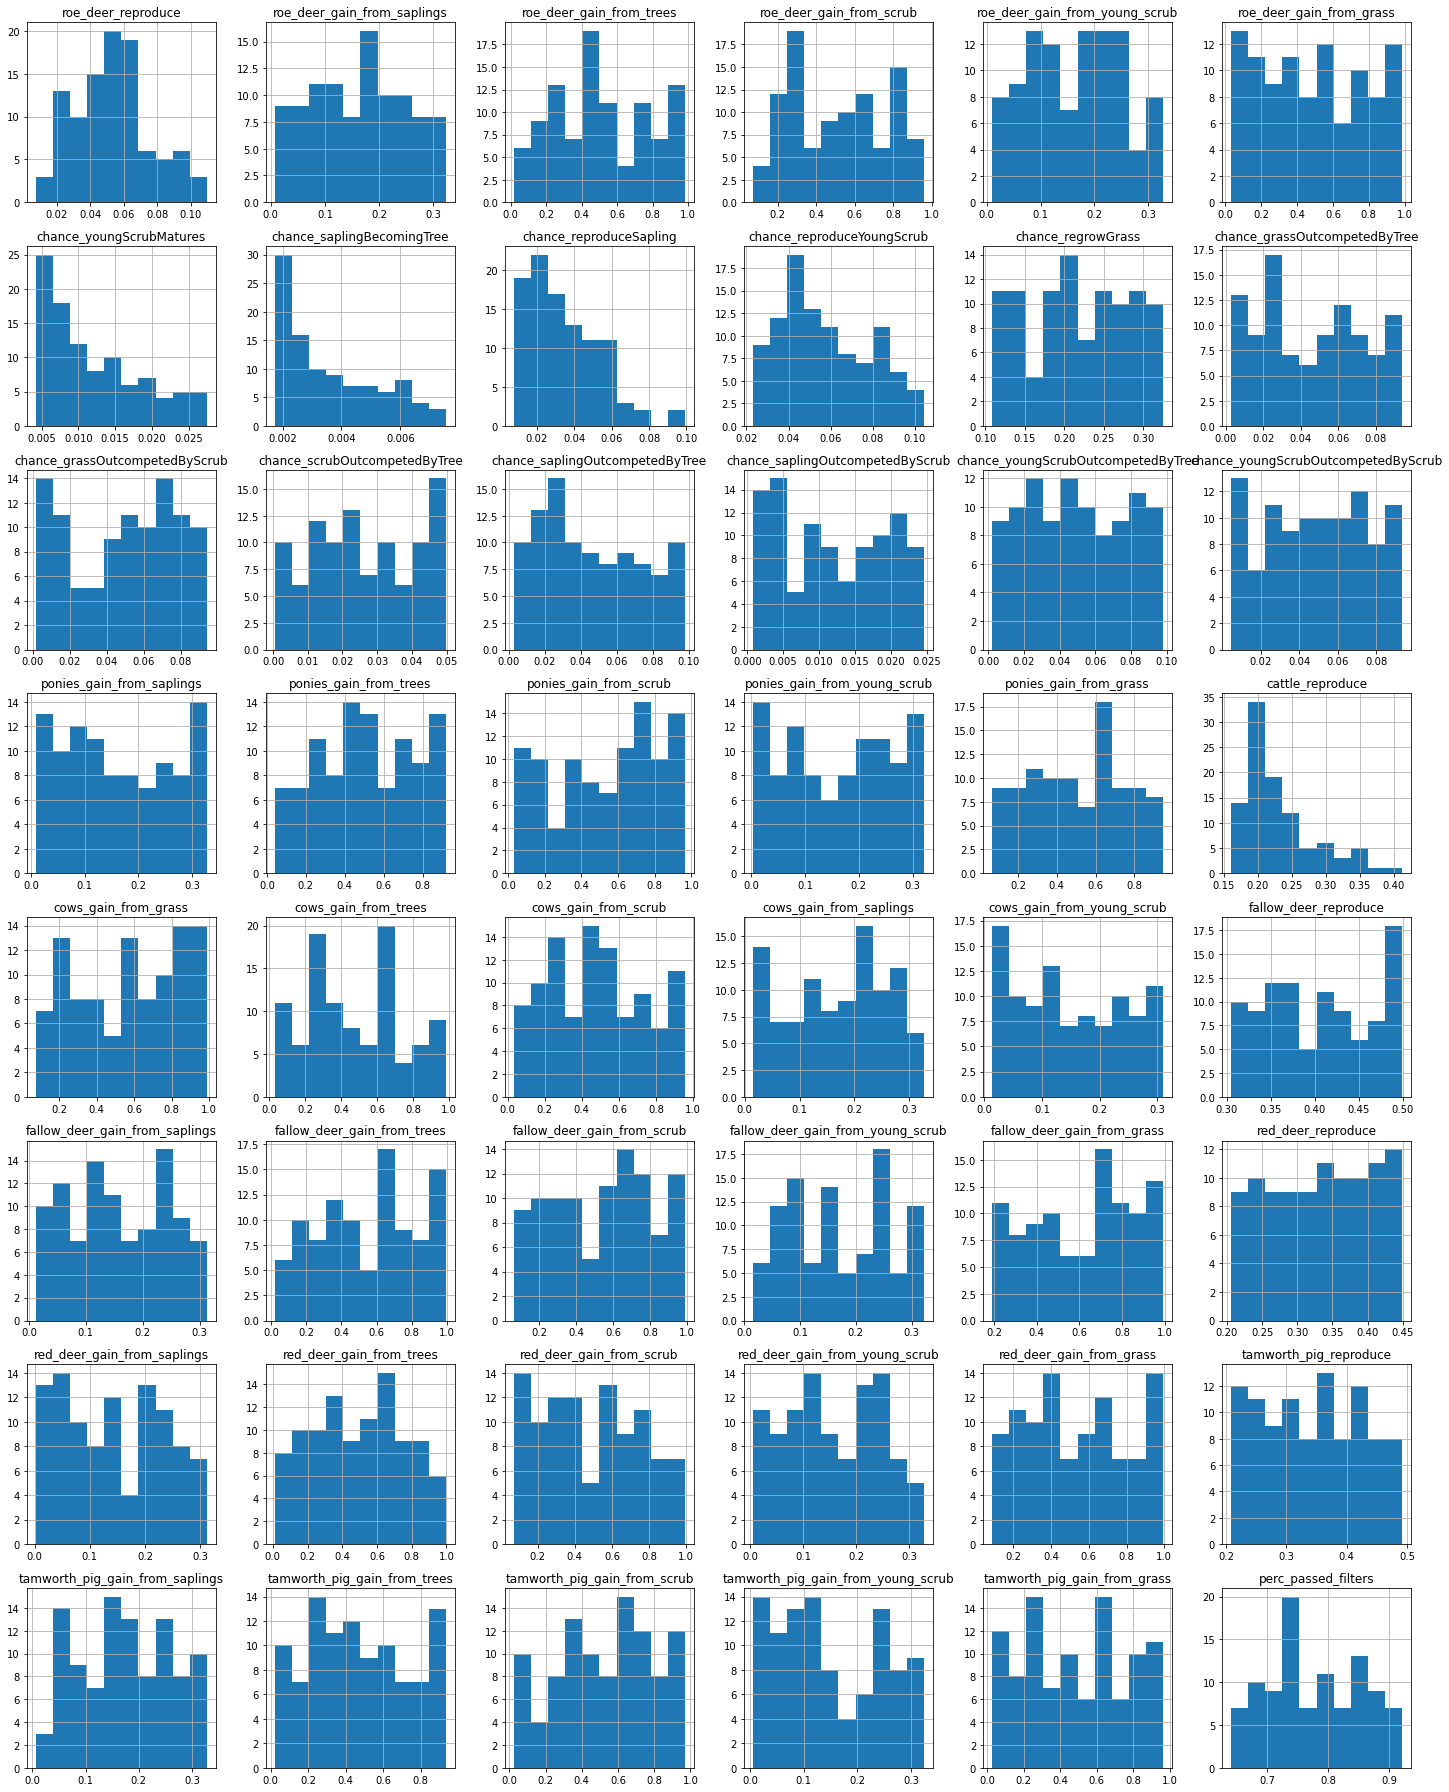

In [44]:
# show where the best fit params are in the histograms
fig, axis = plt.subplots(8,6,figsize=(20, 25))
accepted_params.hist(ax=axis) # no ranges specified
fig.tight_layout() 

### Difficult filters

In [45]:
# open the parameter files
difficult_filters_1 = pd.read_csv("difficult_filters_1.csv")
difficult_filters_2 = pd.read_csv("difficult_filters_2.csv")
difficult_filters_3 = pd.read_csv("difficult_filters_3.csv")
difficult_filters_4 = pd.read_csv("difficult_filters_11.csv")
difficult_filters_5 = pd.read_csv("difficult_filters_12.csv")
difficult_filters_6 = pd.read_csv("difficult_filters_14.csv")
difficult_filters_7 = pd.read_csv("difficult_filters_16.csv")
difficult_filters_8 = pd.read_csv("difficult_filters_17.csv")
difficult_filters_9 = pd.read_csv("difficult_filters_18.csv")
difficult_filters_10 = pd.read_csv("difficult_filters_19.csv")
difficult_filters_11 = pd.read_csv("difficult_filters_20.csv")
difficult_filters_12 = pd.read_csv("difficult_filters_21.csv")
difficult_filters_13 = pd.read_csv("difficult_filters_22.csv")
difficult_filters_14 = pd.read_csv("difficult_filters_23.csv")
difficult_filters_15 = pd.read_csv("difficult_filters_24.csv")

df_filters = pd.concat([difficult_filters_1, difficult_filters_2, difficult_filters_3, difficult_filters_4, difficult_filters_5, difficult_filters_6, difficult_filters_7, difficult_filters_8, difficult_filters_9, difficult_filters_10, difficult_filters_11,difficult_filters_12, difficult_filters_13, difficult_filters_14,difficult_filters_15], axis=0).drop(columns="Unnamed: 0")

In [46]:
# divide the number of times passed by the total number of runs
cleaned_filters = df_filters.groupby("filter_number").sum()/120000

In [47]:
cleaned_filters.loc[cleaned_filters['times_passed'] < 0.01]

,times_passed
filter_number,
48,0.001842
60,0.001217
62,0.000992


### Correlation matrix

In [77]:
c = accepted_params.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[1970:1985])

ponies_gain_from_scrub              perc_passed_filters                   0.258685
perc_passed_filters                 ponies_gain_from_scrub                0.258685
fallow_deer_gain_from_trees         red_deer_gain_from_scrub              0.262328
red_deer_gain_from_scrub            fallow_deer_gain_from_trees           0.262328
cows_gain_from_trees                roe_deer_gain_from_young_scrub        0.278363
roe_deer_gain_from_young_scrub      cows_gain_from_trees                  0.278363
tamworth_pig_gain_from_saplings     fallow_deer_reproduce                 0.312106
fallow_deer_reproduce               tamworth_pig_gain_from_saplings       0.312106
cows_gain_from_trees                roe_deer_gain_from_saplings           0.334294
roe_deer_gain_from_saplings         cows_gain_from_trees                  0.334294
roe_deer_reproduce                  roe_deer_reproduce                    1.000000
cows_gain_from_trees                cows_gain_from_trees                  1.000000
tamw

<AxesSubplot:>

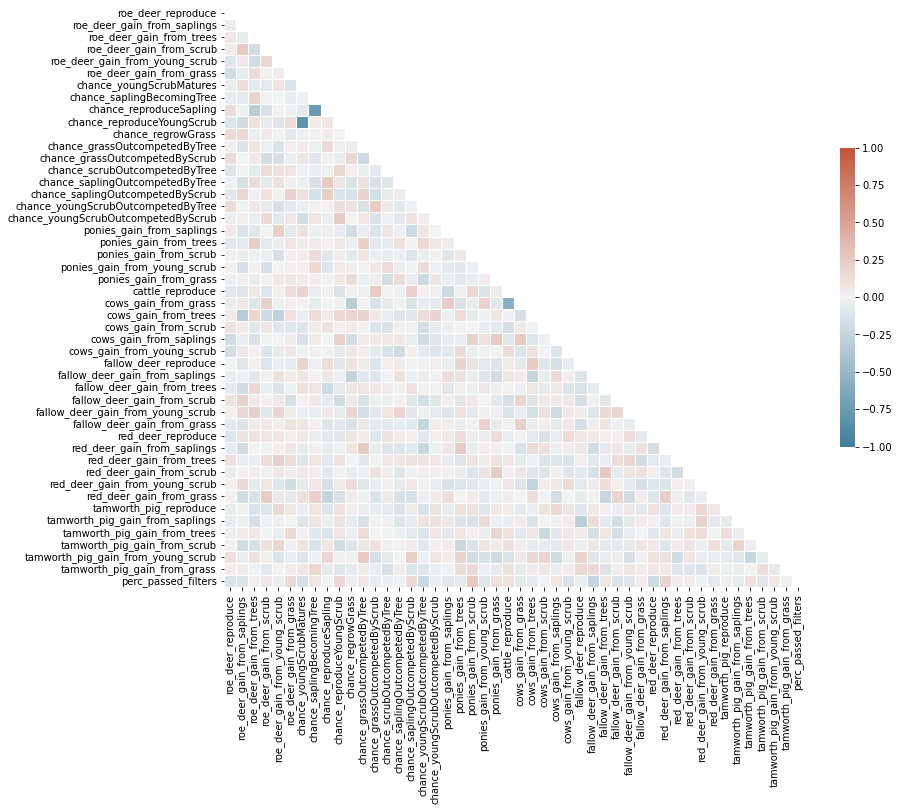

In [50]:
corr = accepted_params.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})